In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import networkx as nx

In [2]:
def initilize_the_graph(start, maximum):

  graph = nx.DiGraph()
  position_to_node = positions_to_nodes(maximum)
  dx = [1, 2, 2, 1, -1, -2, -2, -1]
  dy = [2, 1,-1,-2, -2, -1,  1,  2]

  graph.add_node(0, pos=start)

  for x, y in zip(dx, dy):
    pos = (start[0] + x, start[1] + y)
    if pos in position_to_node.keys():
      graph.add_node(position_to_node[pos], pos=pos)
      graph.add_edge(0, position_to_node[pos])
    
  return graph

In [3]:
def positions_to_nodes(maximum):
  
  i = 1; dictionary = dict()
  
  for x in range(maximum):
    for y in range(maximum):
      dictionary[(x,y)] = i
      i += 1

  return dictionary

In [4]:
def nodes_to_positions(maximum):
  
  i = 1; dictionary = dict()
  
  for x in range(maximum):
    for y in range(maximum):
      dictionary[i] = (x,y)
      i += 1

  return dictionary

In [5]:
def add_moves_to_the_graph(graph, maximum):

  dx = [1, 2, 2, 1, -1, -2, -2, -1]
  dy = [2, 1,-1,-2, -2, -1,  1,  2]
  position_to_node = positions_to_nodes(maximum)
  nodes = list(); edges = list()
  counter = max(list(graph.nodes)) + 1
  for node in graph.nodes:
    for x, y in zip(dx, dy):
      pos = (graph.nodes[node]['pos'][0] + x, graph.nodes[node]['pos'][1] + y)
      if pos in position_to_node.keys():
        nodes.append((position_to_node[pos], {'pos':pos}))
        edges.append((node, position_to_node[pos]))
        counter += 1

  graph.add_nodes_from(nodes)
  graph.add_edges_from(edges)

  return graph

In [6]:
def complete_the_graph(start, target, maximum):

  graph = initilize_the_graph(start, maximum)
  positions = list()

  while tuple(target) not in positions:
    graph = add_moves_to_the_graph(graph, maximum)

    for node in graph.nodes:
      positions.append(graph.nodes[node]['pos'])

  return graph

In [7]:
def number_of_moves(maximum, start, target):

  position_to_node = positions_to_nodes(maximum)
  g = complete_the_graph(start, target, maximum)

  node_to_position = nodes_to_positions(maximum)
  
  return nx.shortest_path(g, source=0, target=position_to_node[target]), node_to_position

In [8]:
def plot_text(start, target, node_to_position, path):
    plt.text(s='S', x=start[0] - 0.2, y=start[1] + .2, fontsize='xx-large', c='black' if (start[0]+start[1])%2==1 else 'white')
    for i, order in zip(path[1:-1], range(len(path[1:-1]))):
        plt.text(s=str(order + 1), x=node_to_position[i][0] - 0.2, y=node_to_position[i][1] + .2, fontsize='xx-large',c='black' if (node_to_position[i][0]+node_to_position[i][1])%2==1 else 'white')
    plt.text(s='T', x=target[0] - 0.2, y=target[1] + .2, fontsize='xx-large',c='black' if (target[0]+target[1])%2==1 else 'white')


In [9]:
def knight_animation(maximum, start, target, path, node_to_position):
    from PIL import Image
    from IPython.display import clear_output
    from matplotlib.offsetbox import AnnotationBbox, OffsetImage
    import time

    fig, ax = plt.subplots()
    array = np.zeros((maximum, maximum))
    for i in range(maximum):
        for j in range(maximum):
            if (i+j) % 2 == 0:
                array[i][j] = 1
            
    ax.matshow(array, cmap='Greys')

    black_knight = Image.open('red knight white.png')
    imagebox_black_knight = OffsetImage(black_knight, zoom=(130 / maximum) / 56)
    ab_black_knight = AnnotationBbox(imagebox_black_knight, list(start), xycoords='data', frameon=False)

    white_knight = Image.open('red knight black.png')
    imagebox_white_knight = OffsetImage(white_knight, zoom=(130 / maximum) / 56)
    ab_white_knight = AnnotationBbox(imagebox_white_knight, list(start), xycoords='data', frameon=False)

    ax.add_artist(ab_black_knight if (start[0]+start[1])%2==1 else ab_white_knight)

    plot_text(start, target, node_to_position, path)
    plt.show()

    time.sleep(.5)   
    clear_output(wait=True)

    for pos in path[1:]:
        fig, ax = plt.subplots()
        array = np.zeros((maximum,maximum))
        for i in range(maximum):
            for j in range(maximum):
                if (i+j) % 2 == 0:
                    array[i][j] = 1
                
        ax.matshow(array, cmap='Greys')

        black_knight = Image.open('red knight white.png')
        imagebox_black_knight = OffsetImage(black_knight, zoom=(130 / maximum) / 56)
        ab_black_knight = AnnotationBbox(imagebox_black_knight, list(node_to_position[pos]), xycoords='data', frameon=False)

        white_knight = Image.open('red knight black.png')
        imagebox_white_knight = OffsetImage(white_knight, zoom=(130 / maximum) / 56)
        ab_white_knight = AnnotationBbox(imagebox_white_knight, list(node_to_position[pos]), xycoords='data', frameon=False)

        ax.add_artist(ab_black_knight if (node_to_position[pos][0]+node_to_position[pos][1])%2==1 else ab_white_knight)

        plot_text(start, target, node_to_position, path)
        plt.show()

        time.sleep(0.5)
        clear_output(wait=True)

In [10]:
def minimum_moves(maximum, start, target):
    try:
        path, node_to_position = number_of_moves(maximum, start, target)
        knight_animation(maximum, start, target, path, node_to_position)
    except:
        print('Impossible!')

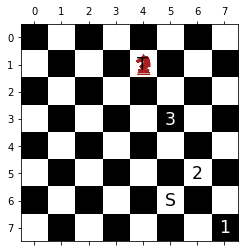

In [13]:
maximum = 8
start = (random.randrange(0,maximum-1),random.randrange(0,maximum-1))
target = (random.randrange(0,maximum-1),random.randrange(0,maximum-1))
minimum_moves(maximum, start, target)

In [14]:
maximum = 8
start = (random.randrange(0,maximum-1),random.randrange(0,maximum-1))
target = (random.randrange(0,maximum-1),random.randrange(0,maximum-1))
path, _ =number_of_moves(maximum, start, target)
print(len(path))

5
